## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd
%cd drive/My Drive
%pwd

/content/drive/My Drive


'/content/drive/My Drive'

In [3]:
%ls -ltr

total 225
drwx------ 2 root root   4096 Nov 25 19:46 'Recipes - Annotated'/
drwx------ 2 root root   4096 Nov 27 03:48  Auto_annotated_recipes/
drwx------ 2 root root   4096 Nov 27 03:57  annotation_code/
drwx------ 2 root root   4096 Nov 29 23:10 'Colab Notebooks'/
drwx------ 2 root root   4096 Nov 30 02:39  NER_code/
drwx------ 2 root root   4096 Nov 30 05:40  Recipes_annotated_python/
drwx------ 2 root root   4096 Nov 30 23:21 'Final Recipes corpus'/
drwx------ 2 root root   4096 Dec  6 03:01  Recipes_annotated_java_1/
drwx------ 2 root root   4096 Dec  6 18:10 'Anyfile Notepad Files'/
drwx------ 2 root root   4096 Dec  6 19:24 'Recipes from allrecipes.com'/
-rw------- 1 root root  26489 Dec  9 06:03 'ELMO with LSTM (1).png'
drwx------ 2 root root   4096 Dec 10 17:18  shilsi_test/
drwx------ 2 root root   4096 Dec 17 20:00  final_recipe_corpus_annotated/
-rw------- 1 root root  26485 Dec 18 03:21 'ELMO with LSTM.png'
-rw------- 1 root root 122995 Dec 18 05:33  NER_with_ELMO.ipynb
dr

## Importing Libraries

In [4]:
# Imports go here
import numpy as np
import pandas as pd
import os
import glob
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


## File Directories

In [0]:
# Read the labeled conell files with the tag for an ingredient as B-OTH and prepare output sequence Y:
connll_directory  = '/content/drive/My Drive/ANLP-Final-Project-Submission/recipe_corpus_annotated_32/'
connll_directory1 = '/content/drive/My Drive//ANLP-Final-Project-Submission/recipe_corpus_annotated_469/'

## Funtion to find ingredients from annotated recipe and return array of ingredients

In [0]:
def ingredient_finder(text):
  content = open(text,'r')
  tagmaps = {}
  ing=[]
  try:
    for line in content:
        words = line.strip().split(" ")
        if(words[1] == "B-OTH" and words[0] not in tagmaps.keys()):
            tagmaps[words[0]] = words[1]
            ing.append(str(words[0]))

    ingredientlables.append(tagmaps)
  except: 
    print(text)
  return ing 

## Funtion to find ingredients from annotated recipe and return array of ingredients

In [0]:
os.chdir(connll_directory )
files_labeled = [f for f in os.listdir(connll_directory)]

In [8]:
food_df=pd.DataFrame(files_labeled)
food_df.columns = ['Recipe_file']
food_df['Recipe']=food_df['Recipe_file']
food_df['Recipe']=food_df['Recipe'].str.split('.',n=1,expand=True)

food_df

,Recipe_file,Recipe
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup
1,aubergine_puree.txt,aubergine_puree
2,clam_chowder.txt,clam_chowder
3,easy_pumpkin_soup.txt,easy_pumpkin_soup
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried
5,dolmeh.txt,dolmeh
6,easy_microwave_tomato.txt,easy_microwave_tomato
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur
9,grilled_onions.txt,grilled_onions


In [9]:
ingredient_finder('clam_chowder.txt')

clam_chowder.txt


['potatoes',
 'potato',
 'floury',
 'boiled',
 'bacon',
 'pork',
 'onion',
 'thyme',
 'peppercorns',
 'paprika',
 'butter',
 'cornmeal',
 'corn',
 'notice',
 'nicer',
 'appearance',
 'leafless',
 'shells',
 'juices',
 'oils',
 'leaflets',
 'bread',
 'salad']

## Funtion to find ingredients from annotated recipe and return array of ingredients

In [10]:
food_df['Ingredients'] = food_df['Recipe_file'].apply(lambda x: ingredient_finder(x))

asparagus-pistachio-soup.txt
aubergine_puree.txt
clam_chowder.txt
easy_pumpkin_soup.txt
beans_midly_spiced_and_stir-fried.txt
dolmeh.txt
easy_microwave_tomato.txt
easy_grilled_leeks_with_grated_cheese.txt
basque-style_cream_mushroom_soup_saveur.txt
grilled_onions.txt
kimchi.txt
healthy_asian_apple_soup.txt
hot_and_sour_shrimp_soup.txt
lettuce_soup.txt
hot_and_sour_cucumbers.txt
hoomos.txt
kapustniak.txt
latkes.txt
kapustnica_sour_cabbage_soup.txt
madjara.txt
mango.txt
oyster_stew.txt
reasted_red_onion_soup.txt
mechthilds_sweet_potatoes.txt
sopa_de_carbasso_bercelonia.txt
potato-turnip_balls.txt
monastery_style_bean_soup.txt
quick_and_dirty.txt
southwestern_onion_soup.txt
stuffed_aubergines.txt
stuffed_peppers_with_egg_and_cheese.txt
sweet_red_pepper_soup.txt


In [11]:
food_df

,Recipe_file,Recipe,Ingredients
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[soup, salt, salted, pistachios, butter, salty..."
1,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
2,clam_chowder.txt,clam_chowder,"[potatoes, potato, floury, boiled, bacon, pork..."
3,easy_pumpkin_soup.txt,easy_pumpkin_soup,"[pumpkin, butternut]"
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried,"[beans, spiced, turmeric, powder, curry, leave..."
5,dolmeh.txt,dolmeh,"[leaf, leaves, rice, peas, sugar, sabzi, herbs..."
6,easy_microwave_tomato.txt,easy_microwave_tomato,[tomato]
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese,"[leeks, cheese, olive, boil]"
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur,"[creamy, mushroom, mushrooms, portobello, porc..."
9,grilled_onions.txt,grilled_onions,[lime]


## Reading files from another directory and following the same process as above

In [12]:
os.chdir(connll_directory1 )
files_labeled1 = [f for f in os.listdir(connll_directory1)]
food_df1=pd.DataFrame(files_labeled1)
food_df1.columns = ['Recipe_file']
food_df1['Recipe']=food_df1['Recipe_file']
food_df1['Recipe']=food_df1['Recipe'].str.split('.',n=1,expand=True)

food_df1

,Recipe_file,Recipe
0,15-Minute Dinner Nachos Supreme.txt,15-Minute Dinner Nachos Supreme
1,Antipasto Squares.txt,Antipasto Squares
2,Annie_s Fruit Salsa and Cinnamon Chips.txt,Annie_s Fruit Salsa and Cinnamon Chips
3,Amy_s Cilantro Cream Sauce.txt,Amy_s Cilantro Cream Sauce
4,Apple Breakfast Bread.txt,Apple Breakfast Bread
...,...,...
464,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls
465,Yummy Roll Ups.txt,Yummy Roll Ups
466,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole
467,Zucchini Bread IV.txt,Zucchini Bread IV


In [13]:
food_df1['Ingredients'] = food_df1['Recipe_file'].apply(lambda x: ingredient_finder(x))

15-Minute Dinner Nachos Supreme.txt
Antipasto Squares.txt
Annie_s Fruit Salsa and Cinnamon Chips.txt
Amy_s Cilantro Cream Sauce.txt
Apple Breakfast Bread.txt
Ali_s Amazing Bruschetta.txt
Amazing Muffin Cups.txt
Apple Crisp II.txt
All-Around Good Smoothie.txt
4H Banana Bread.txt
Apple Dip.txt
Arlene_s Bacon _ Crabmeat.txt
Artichoke _ Spinach Dip Restaurant Style.txt
Artichoke Spinach Dip.txt
Artichoke Bruschetta.txt
Asian Lettuce Wraps.txt
Apple Pie by Grandma Ople.txt
Apple-Raisin French Toast Casserole.txt
Arizona Hatch Chili.txt
Apple Raisin French Toast Strata.txt
Asparagus Quiche.txt
Awesome Sausage, Apple and Cranberry Stuffing.txt
Avocado Corn Salsa.txt
B and L_s Strawberry Smoothie.txt
Baby Spinach Omelet.txt
Awesome and Easy Creamy Corn Casserole.txt
Avocado, Tomato and Mango Salsa.txt
Baby BLT.txt
Baba Ghanoush.txt
Avocado Feta Salsa.txt
Bacon and Cheddar Stuffed Mushrooms.txt
Bacon Quiche Tarts.txt
Bacon Wrapped Barbeque Shrimp.txt
Bacon and Tomato Cups.txt
Bacon for the Fami

In [14]:
food_df1

,Recipe_file,Recipe,Ingredients
0,15-Minute Dinner Nachos Supreme.txt,15-Minute Dinner Nachos Supreme,"[beef, tomato, soup, water, ricepace®, salsash..."
1,Antipasto Squares.txt,Antipasto Squares,"[sliced, boiled, ham, cheese, pepperoni, sausa..."
2,Annie_s Fruit Salsa and Cinnamon Chips.txt,Annie_s Fruit Salsa and Cinnamon Chips,"[fruit, salsa, cinnamon, chips, kiwis, diced, ..."
3,Amy_s Cilantro Cream Sauce.txt,Amy_s Cilantro Cream Sauce,"[cilantro, cream, sauce, cheese, salsa, pepper..."
4,Apple Breakfast Bread.txt,Apple Breakfast Bread,"[apple, bread, butter, sugar, eggs, flour, sod..."
...,...,...,...
464,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls,"[yeastfree, cinnamon, flour, sugar, powder, so..."
465,Yummy Roll Ups.txt,Yummy Roll Ups,"[slices, ham, cream, cheese, dill, pickle, spe..."
466,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole,"[potato, sugar, eggs, salt, butter, milk, vani..."
467,Zucchini Bread IV.txt,Zucchini Bread IV,"[zucchini, bread, eggs, vegetable, oil, sugar,..."


## Appending all dataframes 

In [0]:
food_df=food_df.append(food_df1)

In [16]:
food_df

,Recipe_file,Recipe,Ingredients
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[soup, salt, salted, pistachios, butter, salty..."
1,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
2,clam_chowder.txt,clam_chowder,"[potatoes, potato, floury, boiled, bacon, pork..."
3,easy_pumpkin_soup.txt,easy_pumpkin_soup,"[pumpkin, butternut]"
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried,"[beans, spiced, turmeric, powder, curry, leave..."
...,...,...,...
464,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls,"[yeastfree, cinnamon, flour, sugar, powder, so..."
465,Yummy Roll Ups.txt,Yummy Roll Ups,"[slices, ham, cream, cheese, dill, pickle, spe..."
466,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole,"[potato, sugar, eggs, salt, butter, milk, vani..."
467,Zucchini Bread IV.txt,Zucchini Bread IV,"[zucchini, bread, eggs, vegetable, oil, sugar,..."


In [17]:
len(food_df)

501

## Creating train and test data

In [0]:
train_size = int(len(food_df) * .8)
train_posts = food_df['Ingredients']
train_tags = food_df['Recipe']
train_files_names = food_df['Recipe_file']
 
test_posts = food_df['Ingredients'][train_size:]
test_tags = food_df['Recipe'][train_size:]
test_files_names = food_df['Recipe_file'][train_size:]

In [19]:
len(train_tags)

501

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_posts)
 
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

## Creating input and output shape for Neural-Network Model

In [21]:
vocab_size = x_train.shape[1]
print(vocab_size)

422


In [22]:
num_labels = y_train.shape[1]
num_labels

501

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((501, 422), (501, 501), (101, 422), (101, 501))

## Function to plot loss and accuracy

In [0]:
# Function to plot the statistics
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Model Architecture

In [25]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               216576    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 501)              

## Loss and optimiser for model

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model Training

In [28]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 450 samples, validate on 51 samples
Epoch 1/30





450/450 [==============================] - 5s 11ms/step - loss: 6.4413 - acc: 0.0000e+00 - val_loss: 6.5014 - val_acc: 0.0000e+00
Epoch 2/30
450/450 [==============================] - 0s 400us/step - loss: 5.6710 - acc: 0.1356 - val_loss: 7.4490 - val_acc: 0.0000e+00
Epoch 3/30
450/450 [==============================] - 0s 404us/step - loss: 4.2042 - acc: 0.3778 - val_loss: 8.8165 - val_acc: 0.0000e+00
Epoch 4/30
450/450 [==============================] - 0s 435us/step - loss: 2.0784 - acc: 0.6733 - val_loss: 10.2870 - val_acc: 0.0000e+00
Epoch 5/30
450/450 [==============================] - 0s 422us/step - loss: 0.8865 - acc: 0.8578 - val_loss: 11.9231 - val_acc: 0.0000e+00
Epoch 6/30
450/450 [==============================] - 0s 399us/step - loss: 0.5206 - acc: 0.9044 - val_loss: 12.3684 - val_acc: 0.0000e+00
Epoch 7/30
450/450 

## Loss,Accuracy plots

Training Accuracy: 0.8962
Testing Accuracy:  0.4950


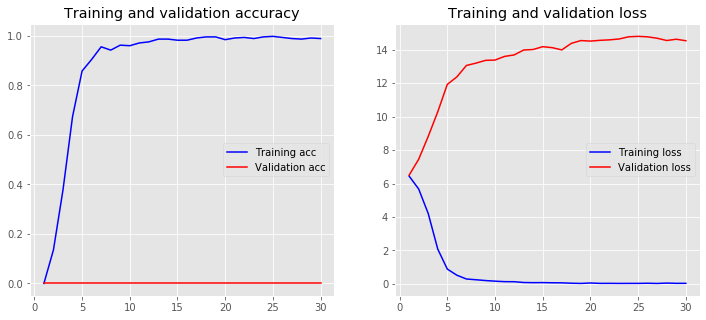

In [29]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Preparing data to test

In [0]:
text_labels = encoder.classes_

In [31]:
text_labels

array(['15-Minute Dinner Nachos Supreme', '4H Banana Bread',
       'Ali_s Amazing Bruschetta', 'All-Around Good Smoothie',
       'Amazing Muffin Cups', 'Amy_s Cilantro Cream Sauce',
       'Annie_s Fruit Salsa and Cinnamon Chips', 'Antipasto Squares',
       'Apple Breakfast Bread', 'Apple Crisp II', 'Apple Dip',
       'Apple Pie by Grandma Ople', 'Apple Raisin French Toast Strata',
       'Apple-Raisin French Toast Casserole', 'Arizona Hatch Chili',
       'Arlene_s Bacon _ Crabmeat', 'Artichoke Bruschetta',
       'Artichoke Spinach Dip',
       'Artichoke _ Spinach Dip Restaurant Style', 'Asian Lettuce Wraps',
       'Asparagus Quiche', 'Avocado Corn Salsa', 'Avocado Feta Salsa',
       'Avocado, Tomato and Mango Salsa',
       'Awesome Sausage, Apple and Cranberry Stuffing',
       'Awesome and Easy Creamy Corn Casserole',
       'B and L_s Strawberry Smoothie', 'BLT Dip', 'Ba_corn Cheese Corn ',
       'Baba Ghanoush', 'Baby BLT', 'Baby Spinach Omelet',
       'Bacon Cheddar De

## Dummy data arrays

In [0]:
a=['apples','bananas','eggs', 'tomato','lettuce', 'ham', 'creme', 'eggs', 'creamy', 'nicely']

In [0]:
b=['bean', 'chillies', 'choice', 'mint','tahiini', 'garbanzos', 'sesame']

## Function to predict recipe by taking ingredient as input

In [0]:
def recipe_suggestor(ingredients):
  n=len(ingredients)
  interim_results = tokenizer.texts_to_matrix(ingredients,mode='tfidf')
  prediction = model.predict(np.array(interim_results))
  pred_label=[]
  for i in range(n):
    predicted_label = text_labels[np.argmax(prediction[i])]
    pred_label.append(predicted_label)
  Result=set(pred_label)
  Result=list(Result)
  return Result  


## Results

In [35]:
recipe_suggestor(a)

['easy_microwave_tomato',
 'German Apple Pancake',
 'Carla_s Fruit Dip',
 'Awesome and Easy Creamy Corn Casserole',
 'Banana Pancakes I',
 'French Toast Souffle',
 'Ham and Cheese Breakfast Quiche',
 'lettuce_soup']

In [36]:
recipe_suggestor(b)

['hoomos', 'monastery_style_bean_soup', 'Best Green Bean Casserole']